In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
original_data = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
print(original_data.head())
print(original_data.shape)

   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1       

In [3]:
print(original_data.isna().sum().sort_values())

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
Review Text                 845
Title                      3810
dtype: int64


In [4]:
original_data = original_data.dropna(subset=['Review Text'])

In [5]:
print(original_data.isna().sum().sort_values())

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                13
Department Name              13
Class Name                   13
Title                      2966
dtype: int64


In [6]:
print(original_data.head())

   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1       

In [7]:
original_data['Title'].fillna('', inplace=True)

In [8]:
print(original_data.isna().sum().sort_values())

Unnamed: 0                  0
Clothing ID                 0
Age                         0
Title                       0
Review Text                 0
Rating                      0
Recommended IND             0
Positive Feedback Count     0
Division Name              13
Department Name            13
Class Name                 13
dtype: int64


In [9]:
original_data['Text'] = original_data['Title'] + ' ' + original_data['Review Text']
print(original_data.head())

   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                            
1           1         1080   34                            
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  \
0                        0       Initmates        Intimate  Intimates   
1     

In [10]:
train_test_data = original_data[['Text', 'Recommended IND']]
print(train_test_data.head())

                                                Text  Recommended IND
0   Absolutely wonderful - silky and sexy and com...                1
1   Love this dress!  it's sooo pretty.  i happen...                1
2  Some major design flaws I had such high hopes ...                0
3  My favorite buy! I love, love, love this jumps...                1
4  Flattering shirt This shirt is very flattering...                1


In [11]:
print(train_test_data.isna().sum().sort_values())

Text               0
Recommended IND    0
dtype: int64


In [12]:
print(train_test_data.dtypes)

Text               object
Recommended IND     int64
dtype: object


In [13]:
# Convert Recommended IND to category
train_test_data = train_test_data.astype({'Recommended IND' : 'category'})

# Write an assert statement making sure of conversion
assert train_test_data['Recommended IND'].dtype == 'category'

In [14]:
print(train_test_data.dtypes)

Text                 object
Recommended IND    category
dtype: object


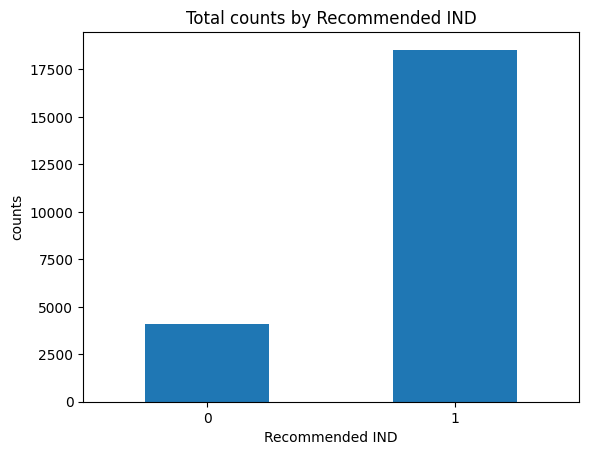

0     4101
1    18540
Name: Recommended IND, dtype: int64


In [15]:
recommended_index_value_counts = train_test_data['Recommended IND'].value_counts().sort_values()
recommended_index_value_counts.plot(kind='bar', title='Total counts by Recommended IND', xlabel='Recommended IND', ylabel='counts', rot=0)
plt.show()
print(recommended_index_value_counts)

In [16]:
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def preprocess_text(text):
    
    # Remove special characters
    text = re.sub(r"[^a-zA-Z]", " ", text)

    # Convert to lowercase
    text = text.lower()
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    #Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Join the tokens back into a single string
    text = " ".join(tokens)
    
    return text

In [17]:
# Apply preprocessing function to Text column
train_test_data['Text'] = train_test_data['Text'].apply(preprocess_text)

In [18]:
print(train_test_data.head())

                                                Text Recommended IND
0        absolutely wonderful silky sexy comfortable               1
1  love dress sooo pretty happened find store gla...               1
2  major design flaw high hope dress really wante...               0
3  favorite buy love love love jumpsuit fun flirt...               1
4  flattering shirt shirt flattering due adjustab...               1


In [19]:
X = train_test_data['Text'].values
y = train_test_data['Recommended IND'].values

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TF-IDF vectorizer and fit it to the training data
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(X_train)

# Convert the training text data to a TF-IDF matrix
train_tfidf_matrix = tfidf_vectorizer.transform(X_train)

# Convert the test text data to a TF-IDF matrix using the trained vectorizer
test_tfidf_matrix = tfidf_vectorizer.transform(X_test)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

logreg = LogisticRegression()
logreg.fit(train_tfidf_matrix, y_train)

y_pred = logreg.predict(test_tfidf_matrix)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 466  354]
 [ 120 3589]]
              precision    recall  f1-score   support

           0       0.80      0.57      0.66       820
           1       0.91      0.97      0.94      3709

    accuracy                           0.90      4529
   macro avg       0.85      0.77      0.80      4529
weighted avg       0.89      0.90      0.89      4529



In [76]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(train_tfidf_matrix, y_train)

y_pred = mnb.predict(test_tfidf_matrix)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  58  762]
 [   1 3708]]
              precision    recall  f1-score   support

           0       0.98      0.07      0.13       820
           1       0.83      1.00      0.91      3709

    accuracy                           0.83      4529
   macro avg       0.91      0.54      0.52      4529
weighted avg       0.86      0.83      0.77      4529



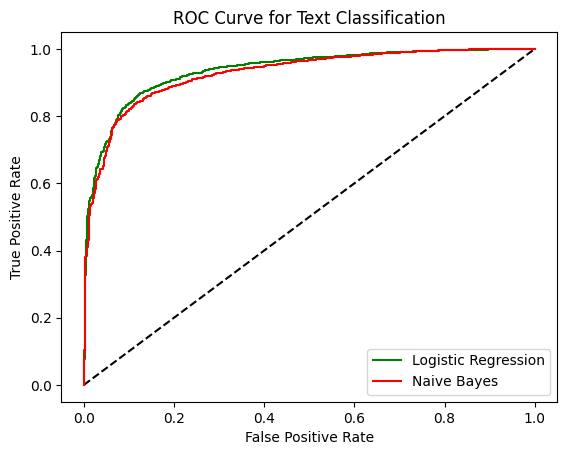

In [77]:
from sklearn.metrics import roc_curve

y_pred_probs_logreg = logreg.predict_proba(test_tfidf_matrix)[:, 1]
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_pred_probs_logreg)

y_pred_probs_mnb = mnb.predict_proba(test_tfidf_matrix)[:, 1]
fpr_mnb, tpr_mnb, thresholds_mnb = roc_curve(y_test, y_pred_probs_mnb)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr_logreg, tpr_logreg, color='g', label='Logistic Regression')
plt.plot(fpr_mnb, tpr_mnb, color='r', label='Naive Bayes')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Text Classification')
plt.show()

In [78]:
from sklearn.model_selection import KFold, RandomizedSearchCV

kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Create the parameter space
params = {"tol": np.linspace(0, 1, 10), 
        "solver": ["liblinear"], 
        "C": np.linspace(1, 20, 20),
        "class_weight": ["balanced"]}

logreg = LogisticRegression()

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf, random_state=42)

# Fit the data to the model
logreg_cv.fit(train_tfidf_matrix, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'tol': 1.0, 'solver': 'liblinear', 'class_weight': 'balanced', 'C': 7.0}
Tuned Logistic Regression Best Accuracy Score: 0.8864850929382984


c:\Users\infra\Desktop\Major Project\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\infra\Desktop\Major Project\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\infra\Desktop\Major Project\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1216, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
                                                ^^^^^^^^^^^^^^^
  File "c:\Users\infra

In [79]:
logreg = LogisticRegression(tol=1.0,
                            C=7.0,  
                            solver='liblinear',      
                            class_weight='balanced', 
                            penalty='l2')

logreg.fit(train_tfidf_matrix, y_train)

y_pred = logreg.predict(test_tfidf_matrix)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 666  154]
 [ 362 3347]]
              precision    recall  f1-score   support

           0       0.65      0.81      0.72       820
           1       0.96      0.90      0.93      3709

    accuracy                           0.89      4529
   macro avg       0.80      0.86      0.82      4529
weighted avg       0.90      0.89      0.89      4529



In [80]:
import pickle

pickle.dump(logreg, open('model.pkl', 'wb'))
pickle.dump(tfidf_vectorizer, open('vectorizer.pkl', 'wb'))